In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [30]:
data = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [83]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [84]:
data.shape

(5110, 12)

# Data Exploration and Feature Engineering

In [85]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [86]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [87]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

bmi has many null values. We will need to do something about this. We can fill it with the median/mean

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Categorical and Numerical Variables

In [52]:
categorical_mask = (data.dtypes=='object')
categorical_columns = data.columns[categorical_mask].tolist()
categorical_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [53]:
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [54]:
categorical_threshold = 3
num_but_cat = [col for col in data.columns if data[col].nunique() < categorical_threshold and
                   data[col].dtypes != "O"]
num_but_cat

['hypertension', 'heart_disease', 'stroke']

# Visualization of Categorical Variables

In [ ]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('darkgrid')
fig.suptitle("Count plot for categorical features")

sns.countplot(ax=axes[0,0],data=data,x='gender')
sns.countplot(ax=axes[0,1],data=data,x='hypertension')
sns.countplot(ax=axes[1,0],data=data,x='heart_disease')
sns.countplot(ax=axes[1,1],data=data,x='ever_married')
sns.countplot(ax=axes[2,0],data=data,x='work_type')
sns.countplot(ax=axes[2,1],data=data,x='Residence_type')
sns.countplot(ax=axes[3,0],data=data,x='smoking_status')
sns.countplot(ax=axes[3,1],data=data,x='stroke')

In [56]:
data['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

# Analysing Categorical Variables with Stroke

In [ ]:

data_cat=data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status']]
fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(data_cat.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight='bold',fontfamily='serif')
    for i in ['top','right']:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=':',axis='y')
    sns.countplot(x=data_cat[val],palette='OrRd_r',hue=data['stroke'])

# Preprocessing

In [52]:
data_train = data.copy()
data_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [53]:
data_train['bmi'] = data_train['bmi'].fillna(data_train['bmi'].mean())
data_train.drop(columns=['id'], inplace=True)

In [54]:
data_train.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Binary Encoding

In [55]:
binary_cols = [col for col in data.columns if data[col].dtype == "O"
               and data[col].nunique() == 2]
# binary_cols

def label_encoder(df):
    for i in binary_cols:
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
    return df

data_train = label_encoder(data_train)

In [56]:
data_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


# Categorical Encoding

In [57]:
cat_cols = ['smoking_status','work_type', 'gender']
data_dummies = data[['smoking_status','work_type', 'gender']]
data_dummies=pd.get_dummies(data_dummies)
data_train.drop(columns=cat_cols,inplace=True)
data_train = data_train.merge(data_dummies, left_index=True, right_index=True, how='left')
data_train.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Female,gender_Male,gender_Other
0,67.0,0,1,1,1,228.69,36.600000,1,0,1,0,0,0,0,1,0,0,0,1,0
1,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0,0,0,0,1,0,1,0,0
2,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,1,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,1,0,0,0,1,0,0,1,0,0,1,0,0
4,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,0,0,1,0,1,0,0


In [35]:
# data_train['gender'] = data_train['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
# data_train['Residence_type'] = data_train['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
# data_train['work_type'] = data_train['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)

In [58]:
X=data_train.drop(['stroke'],axis=1)
y=data_train['stroke']

In [59]:
sc = StandardScaler()
X[num_cols] = sc.fit_transform(X[num_cols])

# Label encoding
X = label_encoder(X)

X.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,gender_Female,gender_Male,gender_Other
0,1.051434,-0.328602,4.185032,1,1,2.706375,1.001234e+00,0,1,0,0,0,0,1,0,0,0,1,0
1,0.786070,-0.328602,-0.238947,1,0,2.121559,1.384666e-15,0,0,1,0,0,0,0,1,0,1,0,0
2,1.626390,-0.328602,4.185032,1,0,-0.005028,4.685773e-01,0,0,1,0,0,0,1,0,0,0,1,0
3,0.255342,-0.328602,-0.238947,1,1,1.437358,7.154182e-01,0,0,0,1,0,0,1,0,0,1,0,0
4,1.582163,3.043196,-0.238947,1,0,1.501184,-6.357112e-01,0,0,1,0,0,0,0,1,0,1,0,0


In [60]:
data_train['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Train Test Split

In [61]:
from sklearn.model_selection import train_test_split # split data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [62]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_balanced, y_train_balanced = smote.fit_resample(X_train, Y_train)

# Classifier Models

## Support Vector Machine

In [63]:
from sklearn.svm import SVC, LinearSVC
svm_classifier = SVC(probability = True) #rbf is gaussian kernel based on radial basis function.
# svm_linear_classifier = LinearSVC(loss="hinge") # non linear classification
# svm_poly_classifier = SVC(kernel="poly", degree=3, coef0=1, C=5) # polynomial kernel


svm_classifier.fit(x_train_balanced, y_train_balanced)
# svm_linear_classifier.fit(X_train, Y_train)
# svm_poly_classifier.fit(X_train, Y_train)

SVC(probability=True)

In [64]:
y_pred_svm = svm_classifier.predict(X_test)
# y_pred_svm_linear = svm_linear_classifier.predict(X_test)
# y_pred_svm_poly = svm_poly_classifier.predict(X_test)


# print('SVM Linear Accuracy:', accuracy_score(Y_test, y_pred_svm_linear))
# print('SVM Polynomial Accuracy:', accuracy_score(Y_test, y_pred_svm_poly))


# Performance Metrics of Support Vector Machine

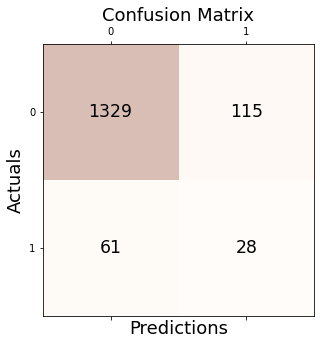

In [65]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred_svm)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [67]:
print('Accuracy:', round(accuracy_score(Y_test, y_pred_svm), 2))
print('Precision',round(precision_score(Y_test,y_pred_svm), 2))
print('Recall',recall_score(Y_test,y_pred_svm))
print('F1 score',f1_score(Y_test,y_pred_svm))
print('ROC score',roc_auc_score(Y_test,y_pred_svm))

Accuracy: 0.89
Precision 0.2
Recall 0.3146067415730337
F1 score 0.24137931034482757
ROC score 0.6174834261881789
